In [28]:
%load_ext autoreload
%autoreload 2

import pandas as pd
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)


# Local Modules
import sys
import os.path
sys.path.insert(0, os.path.abspath('/scratch/horta/coronawiki/'))
from helpers.load import load_interventions, load_aggregated, load_topics, load_pca
from helpers.vars import helper_langs, interventions_helper, int_c, int_ls
from helpers.plot import set_size, plot_dates, plot_intervention, plot_cumm_diff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Latex Configuration
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl


PARAM = {
    "axes.titlesize" : 14,
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'text.usetex': True
}

mpl.rcParams.update(PARAM)

In [5]:
interventions = load_interventions("data/interventions.csv")
topics_df, topics = load_topics('data/topics_linked.csv.xz')
agg = load_aggregated("data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
time_int = 35

In [8]:
dfs_pca_shift = load_pca(codes_order, pca_folder="pca/")

In [9]:
topics

['Culture.Biography.Biography*',
 'Culture.Biography.Women',
 'Culture.Food and drink',
 'Culture.Internet culture',
 'Culture.Linguistics',
 'Culture.Literature',
 'Culture.Media.Books',
 'Culture.Media.Entertainment',
 'Culture.Media.Films',
 'Culture.Media.Media*',
 'Culture.Media.Music',
 'Culture.Media.Radio',
 'Culture.Media.Software',
 'Culture.Media.Television',
 'Culture.Media.Video games',
 'Culture.Performing arts',
 'Culture.Philosophy and religion',
 'Culture.Sports',
 'Culture.Visual arts.Architecture',
 'Culture.Visual arts.Comics and Anime',
 'Culture.Visual arts.Fashion',
 'Culture.Visual arts.Visual arts*',
 'Geography.Geographical',
 'Geography.Regions.Africa.Africa*',
 'Geography.Regions.Africa.Central Africa',
 'Geography.Regions.Africa.Eastern Africa',
 'Geography.Regions.Africa.Northern Africa',
 'Geography.Regions.Africa.Southern Africa',
 'Geography.Regions.Africa.Western Africa',
 'Geography.Regions.Americas.Central America',
 'Geography.Regions.Americas.North

In [10]:
culture_topics={
'Culture.Media.Video games',
'Culture.Media.Books',
'Culture.Internet culture',
'Culture.Visual arts.Fashion',
'Culture.Media.Entertainment',
'Culture.Media.Films',
'Culture.Media.Television',
'Culture.Literature',
'Culture.Media.Radio',
'Culture.Visual arts.Comics and Anime',
'Culture.Media.Software',
'Culture.Food and drink',
'Culture.Media.Media*',
'Culture.Philosophy and religion',
'Culture.Sports',
'Culture.Media.Music'
}

## Video/Games

In [23]:
number_vg = agg['fr']['topics']['Culture.Media.Video games']['len']
sum_vg = agg['fr']['topics']['Culture.Media.Video games']['sum']
percent_vg = agg['fr']['topics']['Culture.Media.Video games']['percent']

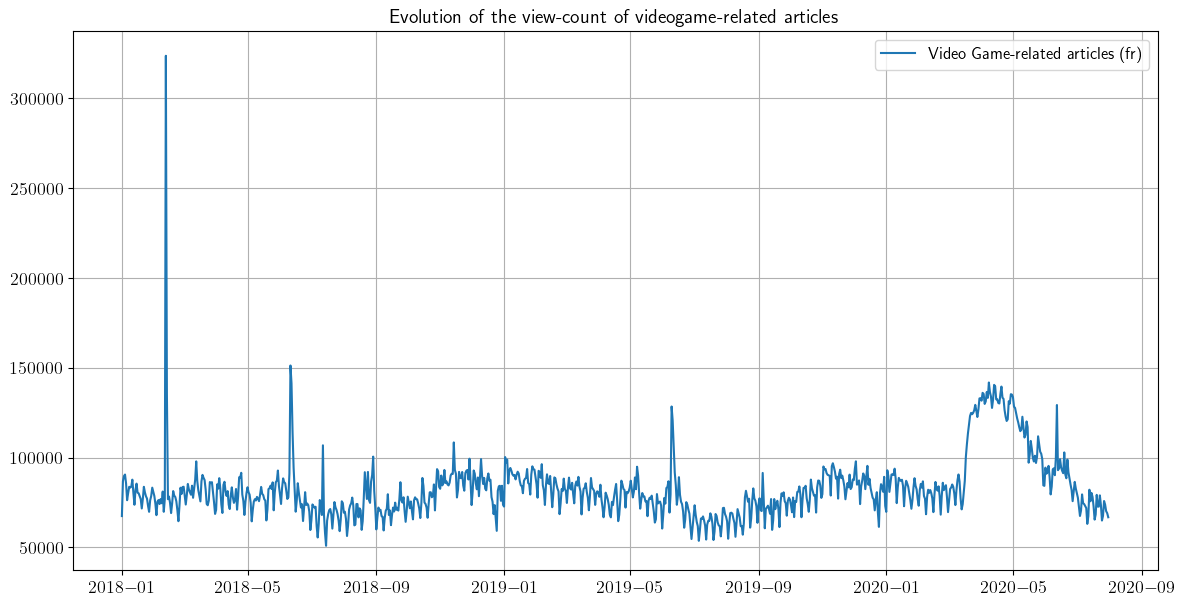

In [27]:
plt.figure(figsize=(14,7))
plt.plot(agg['fr']["sum"].index,sum_vg, label="Video Game-related articles (fr)")
plt.grid()
plt.legend()
plt.title("Evolution of the view-count of videogame-related articles")
plt.show()

136.1890425499862
0.01945678600316593
60.80184796495083
-7.894862547890825
49.54210139991962
-1.4401278590242963
46.98163023521538
-2.312153732317933
51.39047588374955
-1.7703282711053323
38.87420521753462
-1.3778555511322512
39.22795510864916
-3.308358049087432
10.368721390068144
-9.556351779827425
26.442053921578676
-10.506345453251257
10.649013938569725
-5.357599168028525
5.096779753608904
-9.075180835992121
0.1833501902097288
-13.877606413605273


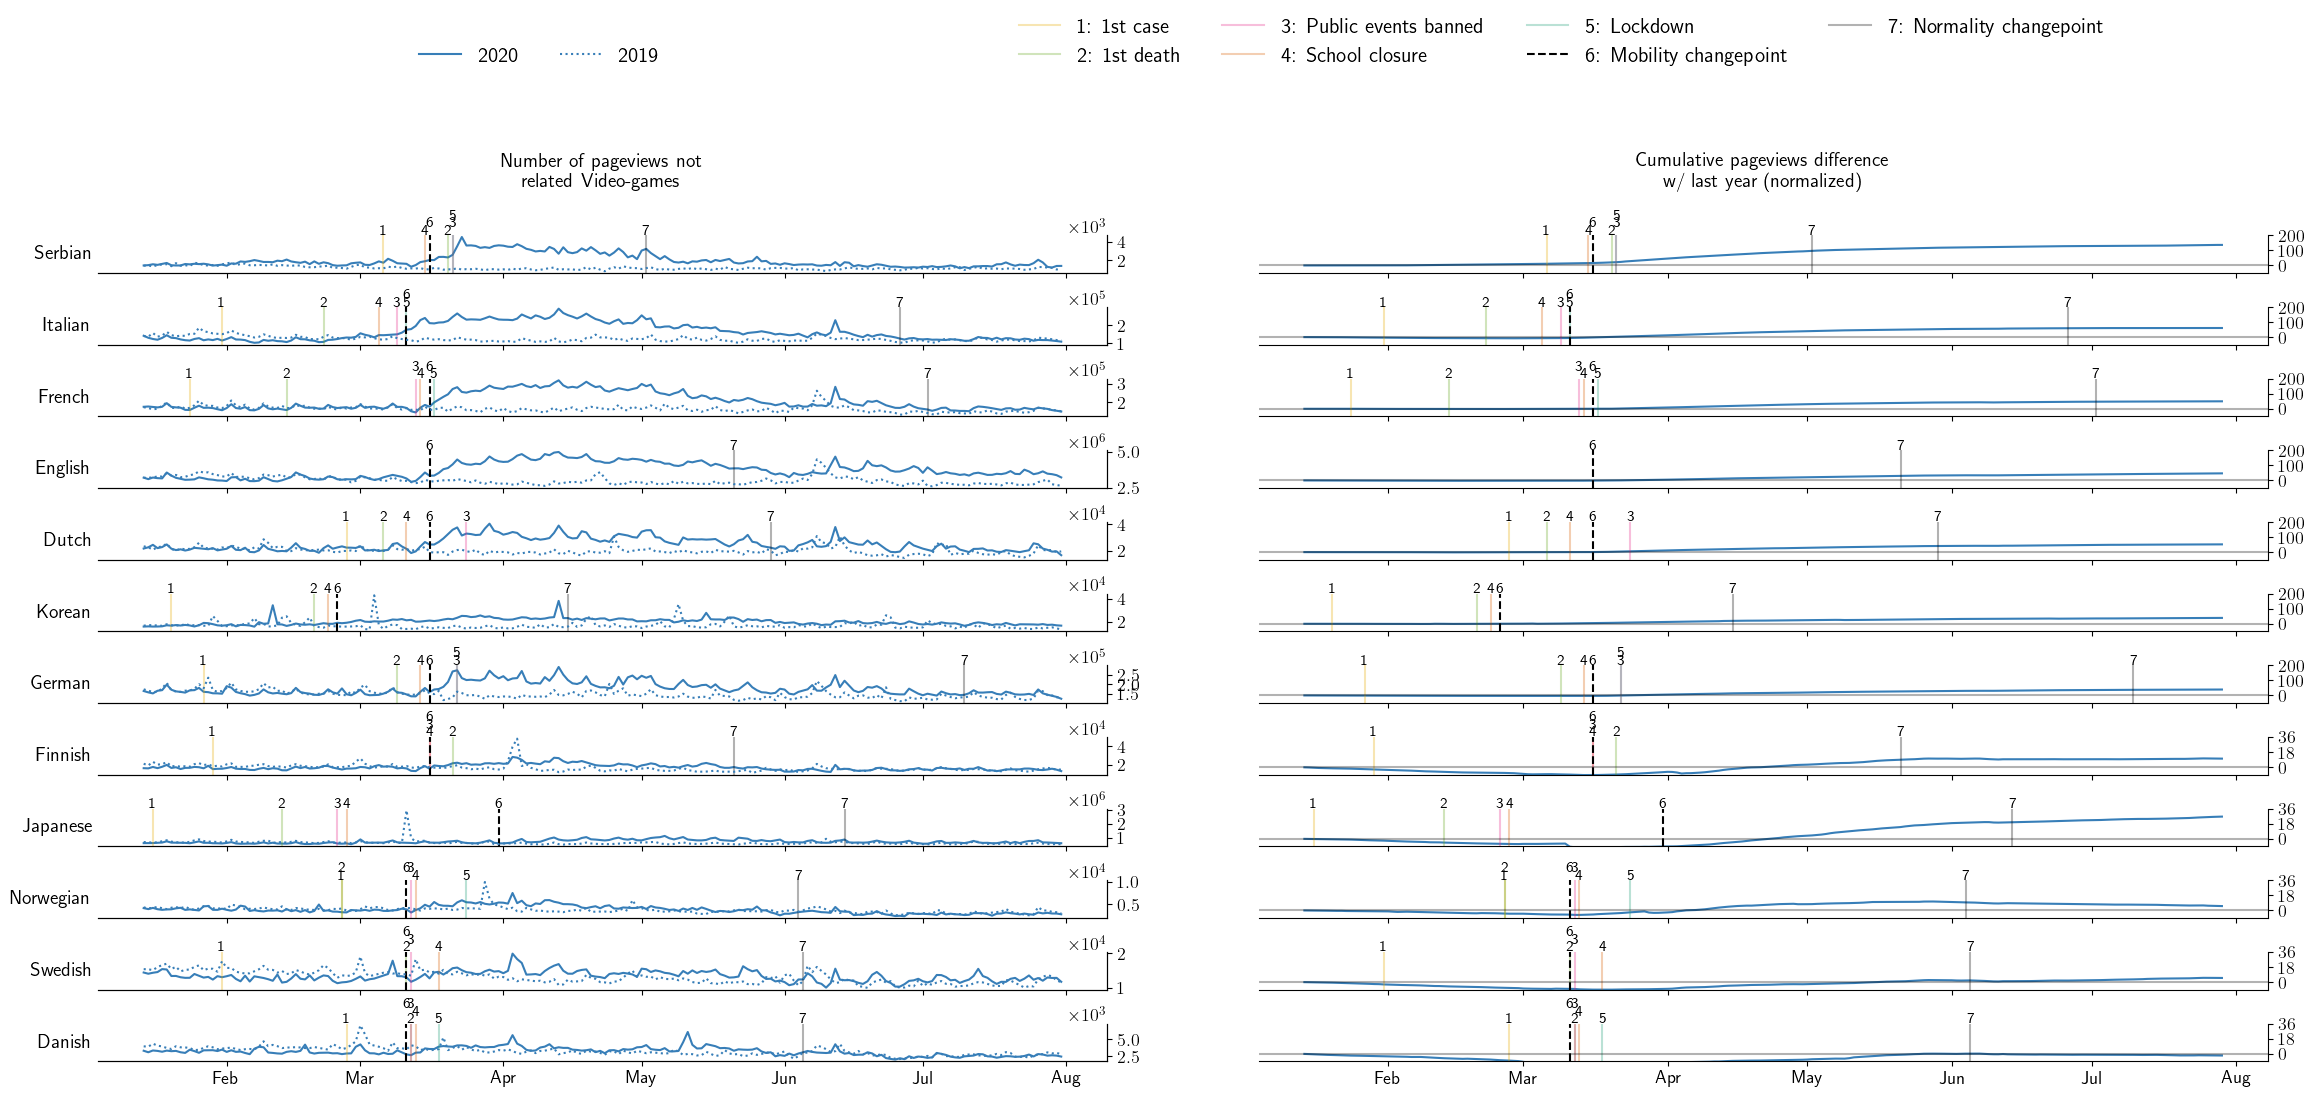

In [49]:
fig, axs = plt.subplots(12, 2,
                        figsize=(28, 14),
                        sharex=False,
                        gridspec_kw={"hspace": 0.9, "wspace": 0.15, "top": 0.7})

for idx, ax_ in enumerate(axs[:, :]):


    # VIDEO-GAME-RELATED PAGEVIEWS

    ax = ax_[0]
    code = codes_order[idx]
    ax.set_ylabel(helper_langs[code], rotation=0, ha="right", va="center", fontsize=14)
    ax_twin = ax.twiny()

    start, end = plot_dates(ax, 20200114, 20200731,
                            agg[code]["sum"].index, agg[code]['topics']['Culture.Media.Video games']["sum"].values + agg[code + ".m"]['topics']['Culture.Media.Video games']["sum"].values,
                            color="#377eb8", sci=False)

    plot_dates(ax_twin, 20190114, 20190731, agg[code]["sum"].index,
               agg[code]['topics']['Culture.Media.Video games']["sum"].values + agg[code + ".m"]['topics']['Culture.Media.Video games']["sum"].values,
               adjust=(start, end), sci=False, xticklabels=False, ls=":", color="#377eb8")


    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

    for ax_t in [ax, ax_twin]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')

    # CUMULATIVE PAGE VIEWS DIFFERENCE

    ax = ax_[1]

    plot_cumm_diff(ax, (20190101, 20191231), [20190115, 20200114], [20190731, 20200729],
                   agg[code]["sum"].index,
                   agg[code]['topics']['Culture.Media.Video games']["sum"].values + agg[code + ".m"]['topics']['Culture.Media.Video games']["sum"].values
                   )

    plot_intervention(ax, interventions, code, "all", interventions_helper, int_ls, int_c)

    ax.set_ylim([-7.5, 15])
    ax.axhline(0, color="black", alpha=0.3)

    for ax_t in [ax]:
        ax_t.spines['left'].set_visible(False)
        ax_t.spines['top'].set_visible(False)
        ax_t.yaxis.set_ticks_position('right')

    if idx in[0,1,2,3,4,5,6]:
        ax.set_ylim(-50,200)
        ax.set_yticks([0, 100, 200])

    else:
        ax.set_ylim(-9,36)
        ax.set_yticks([0, 18, 36])

    for ax in ax_:
        if idx != 11:
            ax.set_xticklabels([])


axs[0,0].set_title("Number of pageviews not\n related Video-games ", pad=35)
axs[0,1].set_title("Cumulative pageviews difference \n w/ last year (normalized)", pad=35)


lines = [
    Line2D([0], [0], color="#377eb8", lw=1.5, ls="-"),
    Line2D([0], [0], color="#377eb8", lw=1.5, ls=":"),
    Line2D([0], [0], color="black", lw=1.5, ls=":")
]

axs[0,0].legend(
    handles=lines,
    labels=["2020", "2019"],
    loc='lower left', bbox_to_anchor=(0.3, 5),
    ncol=3, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=15
)


lines_interv = [Line2D([0], [0], color=int_c[x], ls=int_ls[x], alpha=0.3 if x != "Mobility" else 1.)
                for x, _ in interventions_helper.items()]

axs[0,1].legend(
    handles= lines_interv,
    labels=["{}: {}".format(v,
                            k.replace("Mobility", "Mobility changepoint")\
                            .replace("Normalcy", "Normality changepoint"))
            for k, v in interventions_helper.items()],
    loc='lower center', bbox_to_anchor=(0.3, 5),
    ncol=4, fancybox=False, shadow=False,
    frameon=False, edgecolor=None, fontsize=15
)